# Introduction to Monto Carlo Simulation of a S&P 500-like investment
## Starting with 10,000 and investing an additional 10,000 annually, what is the probability that you will have at least 1,000,000 after 30 years of investing in the S&P 500 etf?

### 1. import needed libraries, set plots to display in notebook

In [1]:
import numpy as np
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plots
# allows currency formatting
import locale
locale.setlocale(locale.LC_ALL, 'en_CA.UTF-8')

'en_CA.UTF-8'

### 2. A traditional savings calculator approach

In [2]:
pv = 10000
time_horizon = 30
i =.07
additions = 10000

for year in range(time_horizon):
    ending = pv * (1+i) + additions
    print("Year " + str(year+1) + ": " + locale.currency(ending, grouping=True))
    pv = ending

Year 1: $20,700.00
Year 2: $32,149.00
Year 3: $44,399.43
Year 4: $57,507.39
Year 5: $71,532.91
Year 6: $86,540.21
Year 7: $102,598.03
Year 8: $119,779.89
Year 9: $138,164.48
Year 10: $157,835.99
Year 11: $178,884.51
Year 12: $201,406.43
Year 13: $225,504.88
Year 14: $251,290.22
Year 15: $278,880.54
Year 16: $308,402.17
Year 17: $339,990.33
Year 18: $373,789.65
Year 19: $409,954.92
Year 20: $448,651.77
Year 21: $490,057.39
Year 22: $534,361.41
Year 23: $581,766.71
Year 24: $632,490.38
Year 25: $686,764.70
Year 26: $744,838.23
Year 27: $806,976.91
Year 28: $873,465.29
Year 29: $944,607.86
Year 30: $1,020,730.41


### 3. Generating one possible future value based on market history; I will use 9% expected return with 18% volatility

In [3]:
pv = 10000
expected_return = .09
volatility = .18
time_horizon = 30
annual_addition = 10000

print("\tReturn", "\t\tEnding Value".rjust(18))
for year in range(time_horizon):
    market_return = np.random.normal(expected_return, volatility)
    fv = pv * (1 + market_return) + annual_addition
    print("\t{}".ljust(10).format(round(market_return,4)), "\t{}".rjust(10).format(locale.currency(fv, grouping=True)))
    pv = fv

	Return     		Ending Value
	-0.0058               	$19,942.39
	0.2984               	$35,893.02
	0.0395               	$47,310.71
	0.3372               	$73,262.34
	0.2459               	$101,275.03
	-0.1861               	$92,426.73
	-0.0935               	$93,781.63
	-0.0941               	$94,955.02
	-0.1368               	$91,965.59
	0.3408               	$133,310.68
	0.1464               	$162,821.95
	-0.0827               	$159,348.86
	0.1139               	$187,503.10
	-0.1159               	$175,780.54
	-0.1012               	$167,985.42
	-0.1012               	$160,982.21
	0.0985               	$186,843.46
	-0.2008               	$159,318.02
	-0.014               	$167,084.56
	0.1777               	$206,774.85
	-0.161               	$183,485.46
	0.1327               	$217,827.41
	0.1323               	$256,644.04
	0.2149               	$321,805.17
	0.146               	$378,790.16
	0.2092               	$468,028.11
	0.1248               	$536,460.22
	0.1321               	$617

### 4. Simulate portfolio ending market values

In [4]:
sim = DataFrame()
iterations = 5000

for x in range(iterations):
    expected_return = .09
    volatility = .18
    time_horizon = 30
    pv = 10000
    annual_investment = 10000
    stream = []
    for i in range(time_horizon):
        end = round(pv * (1 + np.random.normal(expected_return,volatility)) + annual_investment,2)
        stream.append(end)
        pv = end
    sim[x] = stream

### 5. Sample first five streams of annual ending values

In [5]:
first_five = list(range(5))
sim[first_five]

,0,1,2,3,4
0,18697.15,18905.04,19452.93,21261.47,23381.51
1,30732.86,28961.84,30060.99,35999.92,38070.54
2,36967.77,33473.44,41124.81,47637.59,37932.41
3,53945.91,51689.75,54340.49,69192.39,60214.22
4,78387.09,66132.73,54535.38,92206.38,75274.83
5,70524.59,81744.85,64263.28,85859.97,92135.03
6,102272.71,76532.05,93786.76,109112.28,102305.56
7,134084.90,86424.23,133808.50,131564.30,124701.79
8,171046.58,96025.79,117140.67,127918.04,163387.34
9,190389.04,136834.50,181155.20,134511.98,176760.86


### 6. Plot first five simulated portfolios

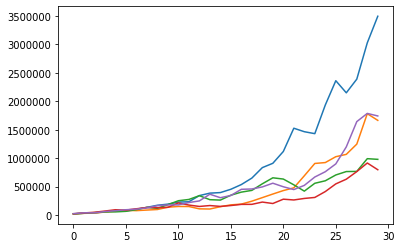

In [6]:
plots.plot(sim[first_five])

### 7. Generate summary statistics with numpy functions

In [7]:
print("Count:", len(sim.loc[29]))
print("Mean: ", locale.currency(np.mean(sim.loc[29]),grouping=True))
print("SD: ",locale.currency(np.std(sim.loc[29]),grouping=True))
print("Max: ",locale.currency(np.max(sim.loc[29]), grouping=True))
print("Min: ", locale.currency(np.min(sim.loc[29]), grouping=True))

Count: 5000
Mean:  $1,520,023.38
SD:  $1,233,871.54
Max:  $20,063,791.75
Min:  $116,559.24


### 8. Generating more comprehensive summary statistics with pandas describe function

In [8]:
ending_values = sim.loc[29]
ending_values.describe()

count    5.000000e+03
mean     1.520023e+06
std      1.233995e+06
min      1.165592e+05
25%      7.655205e+05
50%      1.193644e+06
75%      1.872561e+06
max      2.006379e+07
Name: 29, dtype: float64

### 9. Get a visualization of the distribution of ending values

(array([ 92., 426., 577., 605., 598., 500., 393., 342., 257., 213., 184.,
        134., 111.,  93.,  64.,  52.,  61.,  42.,  46.,  24.,  29.,  20.,
         13.,  17.,  14.,  14.,   6.,  15.,   9.,   5.,   6.,   6.,   4.,
          4.,   3.,   3.,   1.,   1.,   1.,   1.,   0.,   1.,   2.,   0.,
          2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([  116559.24  ,   316031.5651,   515503.8902,   714976.2153,
          914448.5404,  1113920.8655,  1313393.1906,  1512865.5157,
         1712337.8408,  1911810.1659,  2111282.491 ,  2310754.8161,
         2510227.1412,  2709699.4663,  2909171.7914,  3108644.1165,
         3308116.4416,  3507588.7667,  3707061

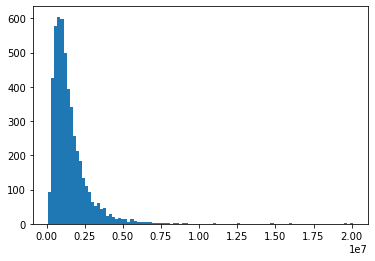

In [9]:
plots.hist(ending_values, bins=100)

### 10. Calculate probability of seeing a specific ending_value or less, for example get close to the 75%ile, or $1,000,000

In [10]:
len(ending_values[ending_values<1000000]) / len(ending_values)

0.3964

### 11. You can't really get a point estimate, but you can get a range ending values

In [11]:
len(ending_values[(ending_values> 800000) & (ending_values< 1100000)]) /len(ending_values)

0.1852

### 12. You can get a more comprehensive table of percentiles easily using numpy's percentile function

In [12]:
p_tiles = np.percentile(ending_values,[5,10,15,25,75,85,90, 95])
for p in range(len(p_tiles)):
    l = [5,10,15,25,75,85,90,95]
    print( "{}%-ile: ".format(l[p]).rjust(15),"{}".format(locale.currency(p_tiles[p], grouping=True)))

       5%-ile:  $416,009.47
      10%-ile:  $510,091.42
      15%-ile:  $603,315.67
      25%-ile:  $765,520.49
      75%-ile:  $1,872,560.99
      85%-ile:  $2,380,363.76
      90%-ile:  $2,854,795.13
      95%-ile:  $3,752,072.17
